In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from google.colab import files
import kagglehub
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nicapotato/womens-ecommerce-clothing-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/womens-ecommerce-clothing-reviews


In [ ]:
import pandas as pd
import os

# Use the path from the previous cell where the dataset was downloaded
dataset_path = "/kaggle/input/womens-ecommerce-clothing-reviews"
file_name = "Womens Clothing E-Commerce Reviews.csv"
file_path = os.path.join(dataset_path, file_name)

df = pd.read_csv(file_path)
display(df.head())

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
#CLEAN DATA
import re
from textblob import TextBlob

#Remove index column if present
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

#Drop NA reviews
df = df.dropna(subset=['Review Text'])

#Fill missing department/class labels
df['Division Name'] = df['Division Name'].fillna('Unknown')
df['Department Name'] = df['Department Name'].fillna('Unknown')
df['Class Name'] = df['Class Name'].fillna('Unknown')

#Clean text
df['clean_text'] = df['Review Text'].str.lower()
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

#Sentiment polarity using TextBlob
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df[['Review Text', 'clean_text', 'sentiment']].head()


,Review Text,clean_text,sentiment
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfor...,0.633333
1,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened to ...,0.318750
2,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,0.076392
3,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,0.500000
4,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,0.393750


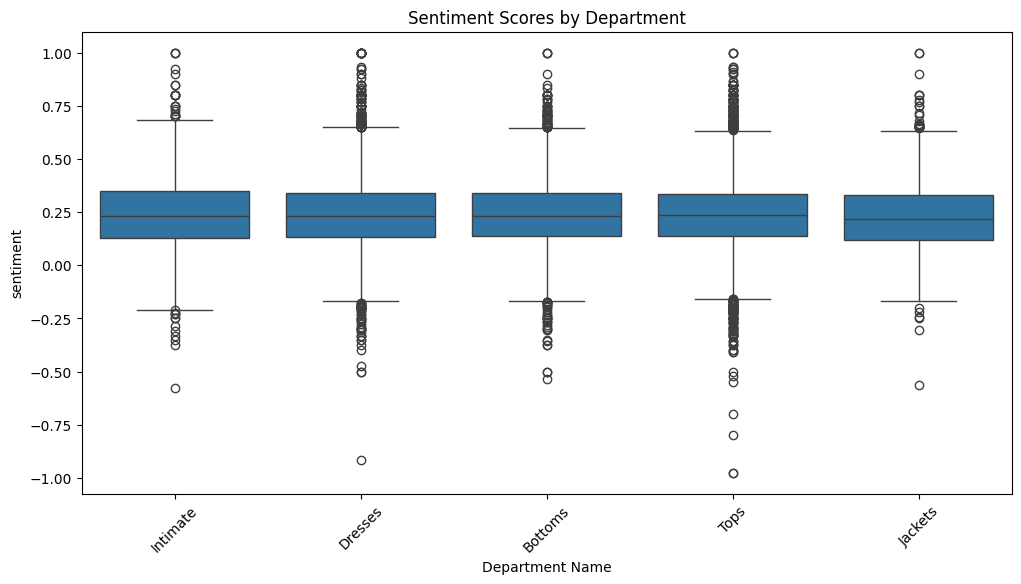

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and it has columns 'Department Name' and 'sentiment'

# Filter out 'Trend' and 'Unknown'
filtered_df = df[~df['Department Name'].isin(['Trend', 'Unknown'])]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Department Name', y='sentiment')
plt.title('Sentiment Scores by Department')
plt.xticks(rotation=45)
plt.show()


After cleaning the text data and applying sentiment analysis using TextBlob, a new sentiment score column was generated to reflect whether a review was positive (closer to 1), neutral (around 0), or negative (closer to -1). The sentiment distribution histogram showed that the majority of reviews leaned toward positive feedback. Further comparison across departments using boxplots revealed that Intimates and Dresses had higher median sentiment values, indicating stronger customer satisfaction in those categories. These insights are valuable for identifying which product areas resonate most positively with customers.

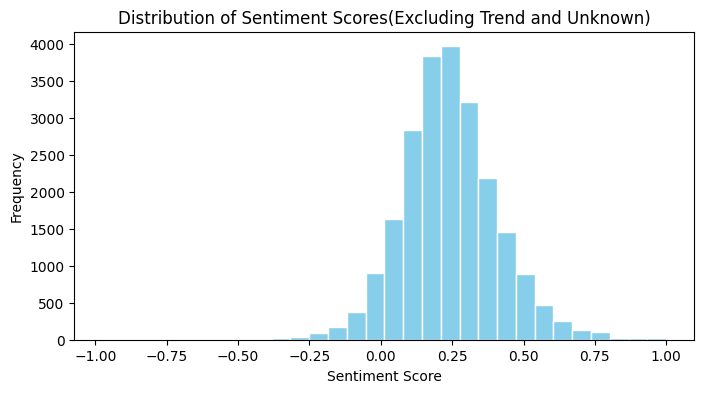

In [ ]:
#Visualize Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
plt.hist(df['sentiment'], bins=30, color='skyblue', edgecolor='white')
plt.title('Distribution of Sentiment Scores(Excluding Trend and Unknown)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


After comparing sentiments across departments using boxplots, the Intimates and dresses departments stood out with higher median sentiment values, indicating better customer satisfaction.

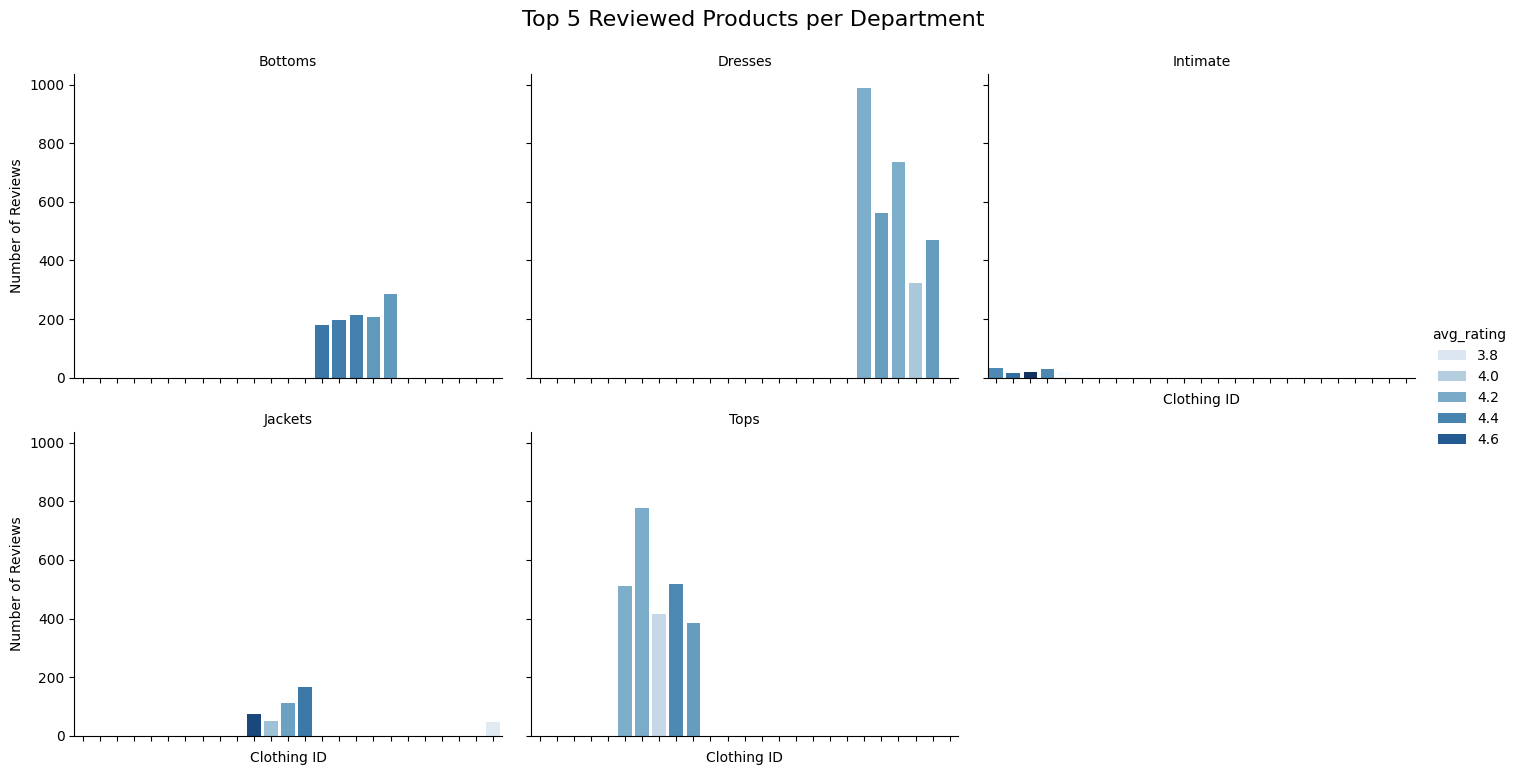

In [ ]:

filtered_df = df[~df['Department Name'].isin(['Trend', 'Unknown'])]

# Top Reviewed Products per Department
top_products = filtered_df.groupby(['Department Name', 'Clothing ID']).agg(
    review_count=('Review Text', 'count'),
    avg_rating=('Rating', 'mean'),
    avg_sentiment=('sentiment', 'mean')
).reset_index()

# Top 5 by review count in each department
top5 = top_products.sort_values(['Department Name', 'review_count'], ascending=[True, False])
top5 = top5.groupby('Department Name').head(5)

# Bar plot
g = sns.catplot(
    data=top5,
    x='Clothing ID',
    y='review_count',
    hue='avg_rating',
    col='Department Name',
    kind='bar',
    col_wrap=3,
    height=4,
    aspect=1.2,
    palette='Blues'
)
g.set_titles("{col_name}")
g.set_axis_labels("Clothing ID", "Number of Reviews")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
plt.suptitle('Top 5 Reviewed Products per Department', fontsize=16)
plt.show()




By grouping the dataset by department and clothing ID, and calculating review counts, average ratings, and sentiment scores, the top five most-reviewed products in each department were identified. The resulting multi-panel bar chart showed that specific products—particularly in categories like Dresses and Intimates—had significantly higher engagement. These high-performing items could serve as flagships for marketing campaigns or be prioritized in restocking and promotional strategies.


In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ertugrulesol/online-retail-data")

print("Path to dataset files:", path)

100%|██████████| 25.5k/25.5k [00:00<00:00, 30.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ertugrulesol/online-retail-data/versions/1


In [ ]:
#FIND THE CSV OR EXCEL FILE IN THE DATASET FOLDER
data_file = None
for file in os.listdir(dataset_path):
    if file.endswith(".csv") or file.endswith(".xlsx") or file.endswith(".xls"):
        data_file = os.path.join(dataset_path, file)
        break

if data_file is None:
    raise FileNotFoundError("No CSV or Excel file found in dataset folder!")

print(f"Loading data from: {data_file}")

Loading data from: /kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [ ]:
import kagglehub
import os
import pandas as pd

# Download the dataset and get the path where it is saved
dataset_path = kagglehub.dataset_download("ertugrulesol/online-retail-data")

# Check files in the downloaded folder
print("Files in dataset folder:", os.listdir(dataset_path))

# Use the actual CSV file name found
file_name = "synthetic_online_retail_data.csv"

# Construct full path to CSV
file_path = os.path.join(dataset_path, file_name)

# Load CSV into DataFrame (encoding may be adjusted if needed)
df_retail = pd.read_csv(file_path, encoding='ISO-8859-1')

print("Online Retail dataset loaded, shape:", df_retail.shape)
display(df_retail.head())


Files in dataset folder: ['synthetic_online_retail_data.csv']
Online Retail dataset loaded, shape: (1000, 13)


,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [ ]:
#Drop rows with missing critical info (like customer_id or product_name)
df_retail.dropna(subset=['customer_id', 'product_name'], inplace=True)

#Convert order_date to datetime
df_retail['order_date'] = pd.to_datetime(df_retail['order_date'])

#Create TotalPrice column
df_retail['total_price'] = df_retail['quantity'] * df_retail['price']

In [ ]:
#KPI CALCULATIONS BY CATEGORY
kpi = df_retail.groupby('category_name').agg({
    'quantity': 'sum',
    'total_price': 'sum',
    'price': 'mean',
    'review_score': 'mean'
}).reset_index()

print(kpi)


        category_name  quantity  total_price       price  review_score
0  Books & Stationery       547    143215.52  261.071347      3.973333
1         Electronics       648    166510.34  259.046715      3.988166
2             Fashion       564    134714.61  244.588737      3.968553
3       Home & Living       563    138540.15  243.175759      3.935897
4   Sports & Outdoors       625    154346.26  251.024076      4.090909


After importing and cleaning the synthetic online retail dataset, additional features like total_price were calculated. A grouped analysis by category showed total quantity sold, total revenue, average price, and average review scores. The results indicated that Electronics and Sports & Outdoors were among the top-performing categories in both sales and customer satisfaction, with Sports & Outdoors showing the highest average review score. These insights are critical for guiding category-level investment and strategic focus.

In [ ]:
#WEEKLY SALES AGGREGATION
df_retail['week'] = df_retail['order_date'].dt.to_period('W').dt.start_time

weekly_sales = df_retail.groupby(['week', 'category_name']).agg({'quantity': 'sum'}).reset_index()


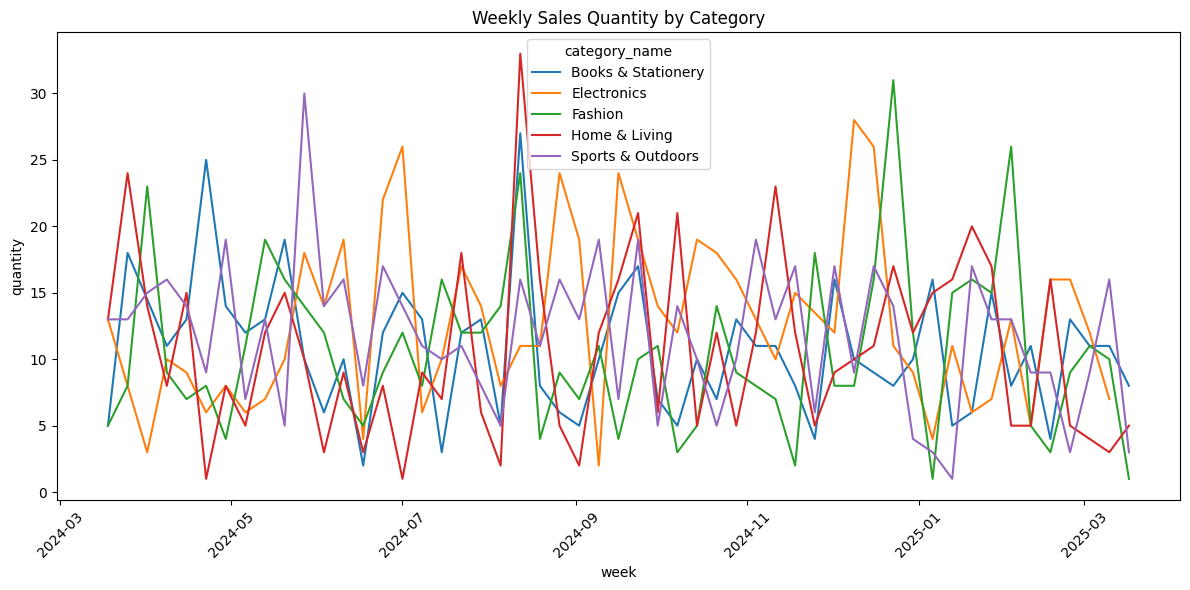

In [ ]:
#PLOTTING WEEKLY SALES BY CATEGORY
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_sales, x='week', y='quantity', hue='category_name')
plt.title('Weekly Sales Quantity by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weekly sales were aggregated to observe how quantity sold fluctuated over time across different categories. The line plot showed that while some categories had variable demand, others like Fashion and Sports & Outdoors demonstrated relatively consistent weekly sales. This type of temporal analysis helps identify seasonality and demand trends, which can improve forecasting accuracy and supply chain planning.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7wg9n68/9rq5e0cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj7wg9n68/6tzw3ucb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86659', 'data', 'file=/tmp/tmpj7wg9n68/9rq5e0cx.json', 'init=/tmp/tmpj7wg9n68/6tzw3ucb.json', 'output', 'file=/tmp/tmpj7wg9n68/prophet_modelsyc_m5am/prophet_model-20250713230823.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:08:23 - cmdstanpy - INFO - Chai

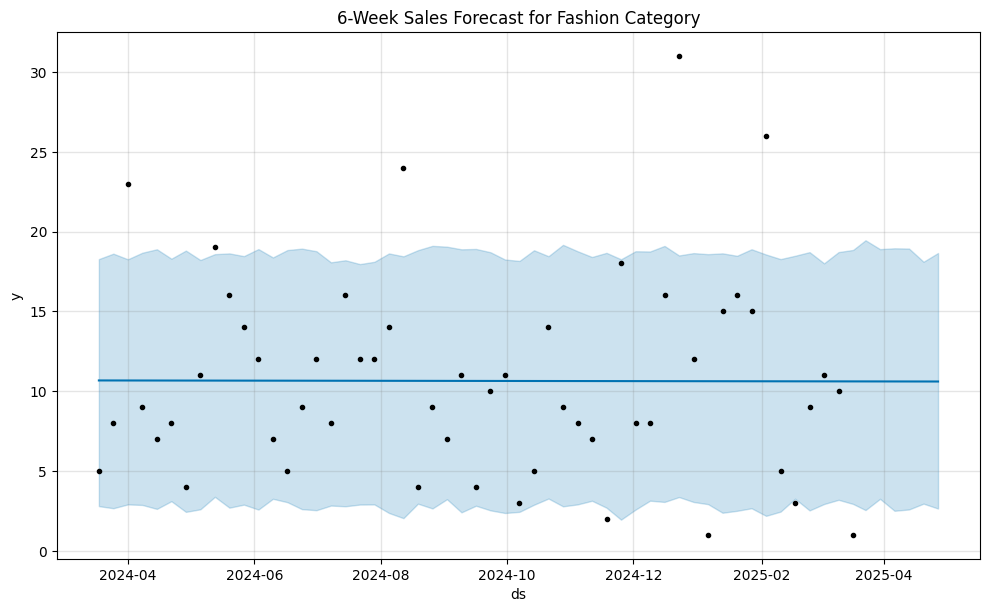

In [ ]:
#FORECASTING FOR A CATEGORY (e.g., Fashion)
fashion_sales = weekly_sales[weekly_sales['category_name'] == 'Fashion']
fashion_sales = fashion_sales.rename(columns={'week': 'ds', 'quantity': 'y'})

from prophet import Prophet
model = Prophet()
model.fit(fashion_sales)

future = model.make_future_dataframe(periods=6, freq='W')
forecast = model.predict(future)

model.plot(forecast)
plt.title('6-Week Sales Forecast for Fashion Category')
plt.show()


The weekly sales data for the Fashion category was used to train a time series forecasting model using Prophet. After fitting the model, a 6-week future forecast was generated and visualized. The forecast plot displayed expected sales trends along with confidence intervals. Although the prediction did not show extreme fluctuations, it suggested a steady pattern with minor variations. This information is valuable for short-term operational decisions like inventory planning, staffing, and promotional efforts.

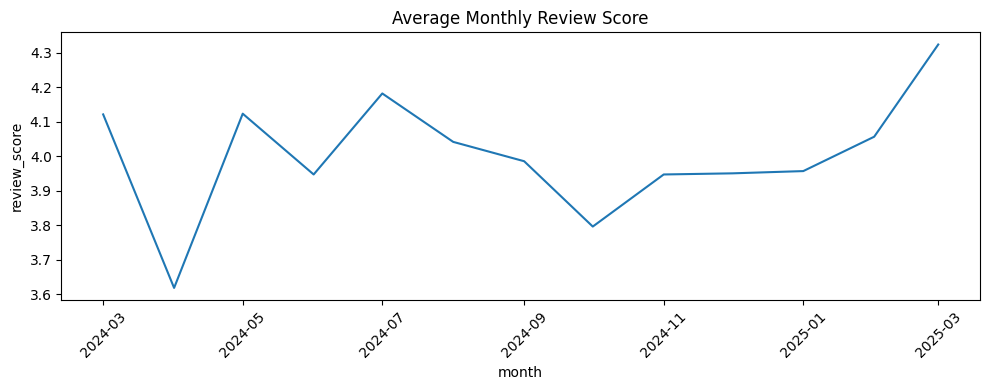

In [ ]:
#REVIEW SCORE INSIGHTS
#Average review score over time (monthly)
df_retail['month'] = df_retail['order_date'].dt.to_period('M').dt.start_time
monthly_reviews = df_retail.groupby('month')['review_score'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_reviews, x='month', y='review_score')
plt.title('Average Monthly Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The average review score was calculated on a monthly basis and plotted to analyze trends in customer satisfaction over time. The resulting line graph showed generally high review scores, with some noticeable fluctuations. These dips could be attributed to seasonal product performance, logistical delays, or changing customer expectations. Monitoring this trend is important for identifying periods of concern and addressing service or quality issues proactively.

Gender distribution:
gender
M    457
F    440
Name: count, dtype: int64


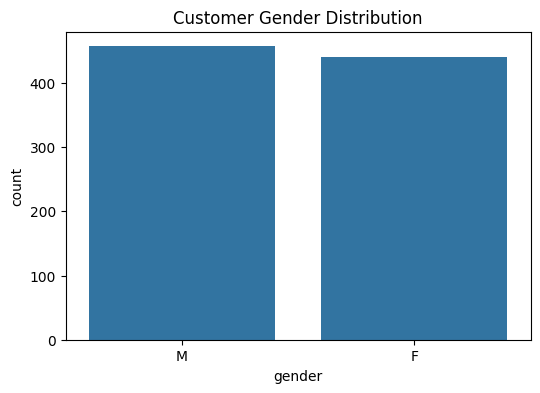

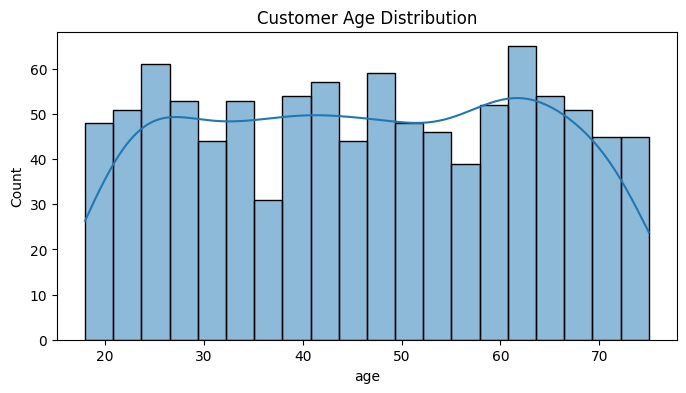

Average Sales and Review Score by Gender:
  gender  total_price  review_score
0      F   753.985568      3.901685
1      M   730.621860      4.049315


In [ ]:
#CUSTOMER DEMOGRAPHICS ANALYSIS

# Gender distribution
gender_counts = df_retail['gender'].value_counts(dropna=True)
print("Gender distribution:")
print(gender_counts)

plt.figure(figsize=(6,4))
sns.countplot(data=df_retail, x='gender', order=gender_counts.index)
plt.title('Customer Gender Distribution')
plt.show()

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df_retail['age'].dropna(), bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

# Average sales and review by gender
gender_stats = df_retail.groupby('gender').agg({
    'total_price': 'mean',
    'review_score': 'mean'
}).reset_index()
print("Average Sales and Review Score by Gender:")
print(gender_stats)



Demographic analysis revealed a relatively balanced number of male and female customers, with males slightly outnumbering females. The age distribution showed that most customers were between their early 20s, late 40s and early 60s. Interestingly, while female customers had a slightly higher average spend per order, male customers gave higher average review scores. These findings can be used to inform gender-specific marketing strategies and better align products with customer preferences.

In [ ]:
# Aggregate performance metrics at the product (SKU) level
sku_features = df_retail.groupby('product_name').agg({
    'quantity': 'sum',
    'total_price': 'sum',
    'price': 'mean',
    'review_score': 'mean'
}).reset_index()

# Fill missing review scores with average
sku_features['review_score'] = sku_features['review_score'].fillna(sku_features['review_score'].mean())

sku_features.head()


,product_name,quantity,total_price,price,review_score
0,Basketball,96,26282.05,275.706944,4.100000
1,Blanket,108,25867.20,238.430769,4.222222
2,Carpet,106,24175.74,230.290811,3.758621
3,Dress,120,25817.21,222.904211,4.137931
4,Eraser,131,30101.39,233.241458,3.717949


In [ ]:
from sklearn.preprocessing import StandardScaler

# Exclude 'product_name' from scaling
features = sku_features.drop(columns='product_name')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
sku_features['cluster'] = kmeans.fit_predict(scaled_features)


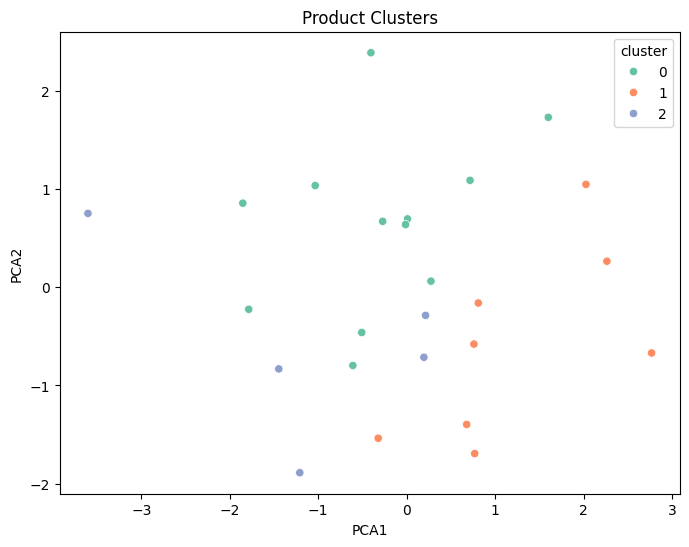

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

sku_features['PCA1'] = pca_result[:, 0]
sku_features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=sku_features, x='PCA1', y='PCA2', hue='cluster', palette='Set2')
plt.title("Product Clusters")
plt.show()


In [ ]:
#SKU Clustering & Export
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Aggregate SKU-level performance
sku_features = df_retail.groupby('product_name').agg({
    'quantity': 'sum',
    'total_price': 'sum',
    'price': 'mean',
    'review_score': 'mean'
}).reset_index()

# Fill missing review scores with mean
sku_features['review_score'] = sku_features['review_score'].fillna(sku_features['review_score'].mean())

# Scale features for clustering
features = sku_features.drop(columns='product_name')
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
sku_features['cluster'] = kmeans.fit_predict(scaled)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
sku_features['PCA1'] = pca_result[:, 0]
sku_features['PCA2'] = pca_result[:, 1]

# Save clustered data to CSV for Power BI
sku_features.to_csv("clustered_sku_data.csv", index=False)

# Optional: Quick check of clusters
print(sku_features.groupby('cluster').agg({
    'quantity': 'mean',
    'total_price': 'mean',
    'price': 'mean',
    'review_score': 'mean',
    'product_name': 'count'
}).rename(columns={'product_name': 'SKU Count'}))


         quantity  total_price       price  review_score  SKU Count
cluster                                                            
0         109.000   28909.8375  265.908721      4.027532         12
1         136.625   32782.4575  242.190387      4.114027          8
2         109.200   25629.8340  234.580001      3.720666          5


In [ ]:
# Fill missing values
df_retail['gender'] = df_retail['gender'].fillna('Unknown')
df_retail['age'] = df_retail['age'].fillna(df_retail['age'].median())
df_retail['review_score'] = df_retail['review_score'].fillna(df_retail['review_score'].mean())

# Ensure order_date is datetime
df_retail['order_date'] = pd.to_datetime(df_retail['order_date'])

# Group by customer
customer_df = df_retail.groupby(['customer_id', 'gender', 'age']).agg({
    'review_score': 'mean',
    'quantity': 'sum',
    'total_price': 'sum',
    'order_date': 'max'
}).reset_index()

# Rename columns for clarity
customer_df.rename(columns={
    'quantity': 'total_quantity',
    'total_price': 'total_spent'
}, inplace=True)


Performance data at the SKU level (including quantity, price, total revenue, and review score) was used to perform clustering using KMeans. After standardizing the data and applying PCA for visualization, the scatter plot revealed three distinct product clusters. These clusters represent high performers, low performers, and niche products. This segmentation enables targeted decisions such as bundling, promotional focus, or discontinuation, improving overall product management and business intelligence.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Create SKU-level feature table
sku_features = df_retail.groupby('product_name').agg({
    'quantity': 'sum',
    'total_price': 'sum',
    'price': 'mean',
    'review_score': 'mean'
}).reset_index()

# Fill missing values
sku_features['review_score'] = sku_features['review_score'].fillna(sku_features['review_score'].mean())

# Scale features
X = sku_features[['quantity', 'total_price', 'price', 'review_score']]
X_scaled = StandardScaler().fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
sku_features['cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
sku_features['PCA1'] = pca_result[:, 0]
sku_features['PCA2'] = pca_result[:, 1]

# Save CSV
sku_features.to_csv("clustered_sku_data.csv", index=False)



In [ ]:
print(sku_features[['PCA1', 'PCA2']].describe())


            PCA1          PCA2
count  25.000000  2.500000e+01
mean    0.000000  4.218847e-17
std     1.407343  1.091303e+00
min    -3.600436 -1.866059e+00
25%    -0.561148 -6.694395e-01
50%     0.011925 -1.286520e-01
75%     0.744833  7.719839e-01
max     2.777998  2.430892e+00


In [ ]:
# Export all needed data
df_retail.to_csv("retail_cleaned.csv", index=False)
df.to_csv("reviews_cleaned.csv", index=False)
weekly_sales.to_csv("weekly_sales.csv", index=False)
customer_df.to_csv('customer_insights.csv', index=False)

In [ ]:
from google.colab import files
files.download("retail_cleaned.csv")
files.download("reviews_cleaned.csv")
files.download("weekly_sales.csv")
files.download("clustered_sku_data.csv")
files.download("customer_insights.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>